<a href="https://colab.research.google.com/github/dudasfig/congenital-syphilis-cases-/blob/main/Projeto_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving attributes.csv to attributes.csv
Saving data_set.csv to data_set.csv


In [ ]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os arquivos CSV
attributes_file = 'attributes.csv'  # Substituir pelo caminho correto
data_file = 'data_set.csv'          # Substituir pelo caminho correto

# Carregando os datasets
attributes = pd.read_csv(attributes_file)
data = pd.read_csv(data_file)

# Pré-visualizar os dados
print(data.head())
print(data.info())


   VDRL_RESULT  CONS_ALCOHOL  RH_FACTOR  SMOKER  PLAN_PREGNANCY  BLOOD_GROUP  \
0          1.0           1.0        0.0     1.0             1.0          1.0   
1          1.0           1.0        0.0     1.0             1.0          0.0   
2          1.0           1.0        2.0     1.0             1.0          4.0   
3          1.0           1.0        2.0     1.0             0.0          4.0   
4          1.0           1.0        0.0     1.0             1.0          1.0   

   HAS_PREG_RISK  TET_VACCINE  IS_HEAD_FAMILY  MARITAL_STATUS  ...  \
0            1.0          0.0             1.0             0.0  ...   
1            1.0          0.0             1.0             5.0  ...   
2            1.0          0.0             1.0             5.0  ...   
3            0.0          0.0             1.0             5.0  ...   
4            1.0          0.0             1.0             1.0  ...   

   HAS_FAM_INCOME  LEVEL_SCHOOLING  CONN_SEWER_NET  NUM_RES_HOUSEHOLD  \
0             0.0        

In [ ]:
data.head()

,VDRL_RESULT,CONS_ALCOHOL,RH_FACTOR,SMOKER,PLAN_PREGNANCY,BLOOD_GROUP,HAS_PREG_RISK,TET_VACCINE,IS_HEAD_FAMILY,MARITAL_STATUS,...,HAS_FAM_INCOME,LEVEL_SCHOOLING,CONN_SEWER_NET,NUM_RES_HOUSEHOLD,HAS_FRU_TREE,HAS_VEG_GARDEN,FAM_INCOME,HOUSING_STATUS,WATER_TREATMENT,AGE
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,5.0,0.0,2.0,1.0,1.0,0.0,1.0,2.0,25.0
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,...,0.0,5.0,0.0,2.0,1.0,1.0,2.0,1.0,3.0,25.0
2,1.0,1.0,2.0,1.0,1.0,4.0,1.0,0.0,1.0,5.0,...,1.0,6.0,2.0,4.0,1.0,1.0,3.0,0.0,3.0,24.0
3,1.0,1.0,2.0,1.0,0.0,4.0,0.0,0.0,1.0,5.0,...,0.0,2.0,1.0,3.0,1.0,1.0,0.0,0.0,2.0,28.0
4,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,4.0,1.0,3.0,1.0,1.0,0.0,0.0,3.0,27.0


In [ ]:
attributes.head()

,Attribute,Description,Type,Categorization
0,VDRL_RESULT,VDRL result,Binary,(i) Positive and (ii) Negative
1,CONS_ALCOHOL,Consume alcohol,Categorical,"(i) Positive, (ii) Negative,\nand (iii) Not in..."
2,RH_FACTOR,RH factor,Categorical,"(i) Positive, (ii) Negative,\nand (iii) Not in..."
3,SMOKER,Smoker,Categorical,"(i) Positive, (ii) Negative,\nand (iii) Not in..."
4,PLAN_PREGNANCY,Planned pregnancy,Categorical,"(i) Positive, (ii) Negative,\nand (iii) Not in..."


In [ ]:
# Remover valores inconsistentes (ex.: valores negativos em AGE)
data = data[data['AGE'] >= 0]

# Estatísticas após limpeza
print(data.describe())

# Verificar a distribuição de VDRL_RESULT
vdrl_distribution = data['VDRL_RESULT'].value_counts()
print("Distribuição de VDRL_RESULT:")
print(vdrl_distribution)

# Identificar valores ausentes
missing_values = data.isnull().sum()
print("Valores ausentes por coluna:")
print(missing_values)


        VDRL_RESULT  CONS_ALCOHOL     RH_FACTOR        SMOKER  PLAN_PREGNANCY  \
count  41761.000000  41761.000000  41761.000000  41761.000000    41761.000000   
mean       0.980221      1.068892      0.714758      1.040684        0.648691   
std        0.139242      0.353038      0.931209      0.331456        0.573166   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
25%        1.000000      1.000000      0.000000      1.000000        0.000000   
50%        1.000000      1.000000      0.000000      1.000000        1.000000   
75%        1.000000      1.000000      2.000000      1.000000        1.000000   
max        1.000000      2.000000      2.000000      2.000000        2.000000   

        BLOOD_GROUP  HAS_PREG_RISK   TET_VACCINE  IS_HEAD_FAMILY  \
count  41761.000000   41761.000000  41761.000000    41761.000000   
mean       1.810421       0.918297      0.164915        0.960250   
std        1.676980       0.412950      0.475784        0.499569  

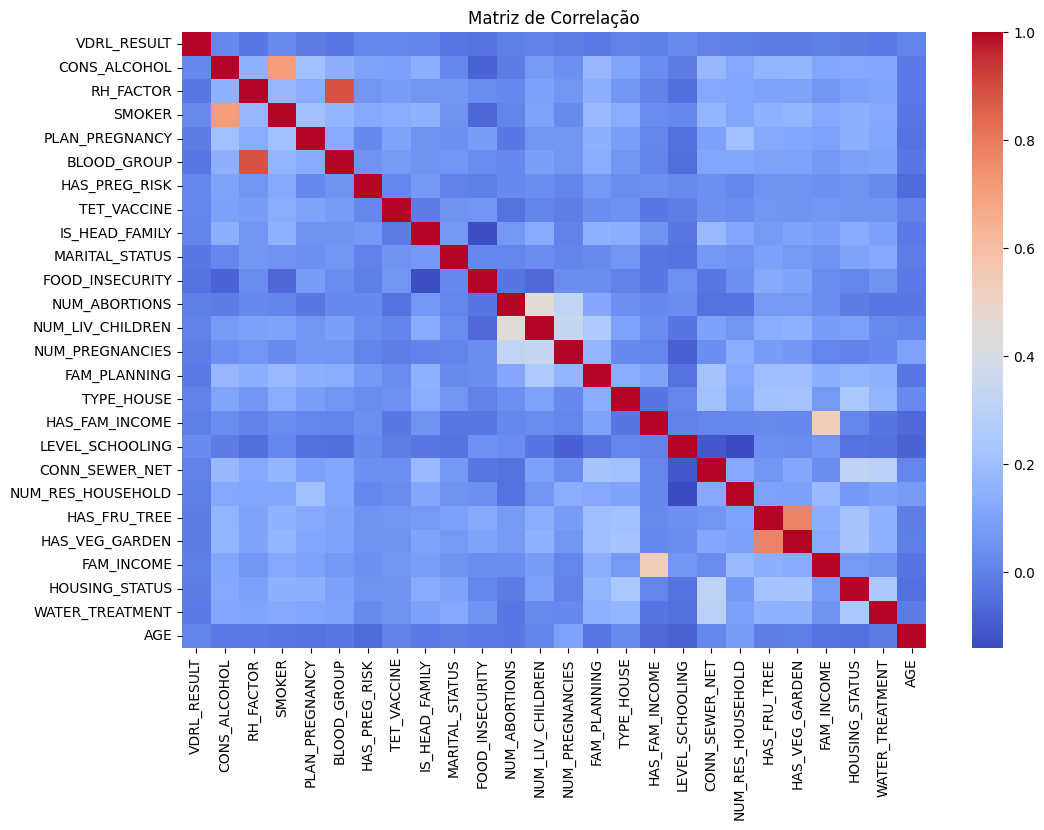

Top correlações com AGE:
AGE                  1.000000
NUM_PREGNANCIES      0.100206
NUM_RES_HOUSEHOLD    0.076153
TYPE_HOUSE           0.027122
CONN_SEWER_NET       0.014522
VDRL_RESULT          0.008182
NUM_LIV_CHILDREN     0.008035
TET_VACCINE          0.006589
HAS_VEG_GARDEN      -0.002214
HAS_FRU_TREE        -0.007589
Name: AGE, dtype: float64


In [ ]:
# Matriz de correlação
correlation_matrix = data.corr()

# Visualização da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

# Correlações com AGE
print("Top correlações com AGE:")
print(correlation_matrix['AGE'].sort_values(ascending=False).head(10))


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Separar variáveis categóricas e aplicar OneHotEncoder
categorical_columns = data.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False)  # Atualizado para a nova versão do scikit-learn
encoded_data = pd.DataFrame(encoder.fit_transform(data[categorical_columns]),
                            columns=encoder.get_feature_names_out(categorical_columns))

# Concatenar dados codificados com numéricos
data_cleaned = data.drop(categorical_columns, axis=1)
data_final = pd.concat([data_cleaned, encoded_data], axis=1)

print("Codificação finalizada. Formato dos dados resultantes:")
print(data_final.head())


Codificação finalizada. Formato dos dados resultantes:
   VDRL_RESULT  CONS_ALCOHOL  RH_FACTOR  SMOKER  PLAN_PREGNANCY  BLOOD_GROUP  \
0          1.0           1.0        0.0     1.0             1.0          1.0   
1          1.0           1.0        0.0     1.0             1.0          0.0   
2          1.0           1.0        2.0     1.0             1.0          4.0   
3          1.0           1.0        2.0     1.0             0.0          4.0   
4          1.0           1.0        0.0     1.0             1.0          1.0   

   HAS_PREG_RISK  TET_VACCINE  IS_HEAD_FAMILY  MARITAL_STATUS  ...  \
0            1.0          0.0             1.0             0.0  ...   
1            1.0          0.0             1.0             5.0  ...   
2            1.0          0.0             1.0             5.0  ...   
3            0.0          0.0             1.0             5.0  ...   
4            1.0          0.0             1.0             1.0  ...   

   HAS_FAM_INCOME  LEVEL_SCHOOLING  CONN_SE

In [ ]:
from sklearn.model_selection import train_test_split

# Divisão dos dados em treino e teste
target_classification = 'VDRL_RESULT'  # Alvo para classificação
X_classification = data_final.drop(target_classification, axis=1)
y_classification = data_final[target_classification]

# Separar conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42)

print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)


Tamanho do conjunto de treino: (33409, 25)
Tamanho do conjunto de teste: (8353, 25)


In [ ]:
# Verificar se há valores ausentes na variável alvo
print("Valores ausentes em y_classification antes da limpeza:")
print(y_classification.isnull().sum())

# Remover linhas com valores ausentes em y_classification
data_final = data_final[data_final[target_classification].notnull()]

# Atualizar X e y após a remoção de valores ausentes
X_classification = data_final.drop(target_classification, axis=1)
y_classification = data_final[target_classification]

# Divisão dos dados novamente
X_train, X_test, y_train, y_test = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42)

print("Após a limpeza:")
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)


Valores ausentes em y_classification antes da limpeza:
1
Após a limpeza:
Tamanho do conjunto de treino: (33408, 25)
Tamanho do conjunto de teste: (8353, 25)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Definir AGE como alvo para regressão
target_regression = 'AGE'
X_regression = data_final.drop(target_regression, axis=1)
y_regression = data_final[target_regression]

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42)

# Modelo de Random Forest para regressão
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)
y_pred_reg = rf_regressor.predict(X_test_reg)

# Avaliar desempenho do modelo
mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 2.88
RMSE: 4.14


In [ ]:
# Verificar se há valores ausentes na variável alvo
print("Valores ausentes em y_classification antes da limpeza:")
print(y_classification.isnull().sum())

# Remover linhas com valores ausentes em y_classification
data_final = data_final[data_final[target_classification].notnull()]

# Atualizar X e y após a remoção de valores ausentes
X_classification = data_final.drop(target_classification, axis=1)
y_classification = data_final[target_classification]

# Divisão dos dados novamente
X_train, X_test, y_train, y_test = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42)

print("Após a limpeza:")
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)


Valores ausentes em y_classification antes da limpeza:
0
Após a limpeza:
Tamanho do conjunto de treino: (33408, 25)
Tamanho do conjunto de teste: (8353, 25)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Modelo de Random Forest para classificação
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

# Avaliar desempenho do modelo
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.50      0.01      0.02       158
         1.0       0.98      1.00      0.99      8195

    accuracy                           0.98      8353
   macro avg       0.74      0.51      0.51      8353
weighted avg       0.97      0.98      0.97      8353



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split

# Separar a variável alvo para regressão
target_regression = 'AGE'
X_regression = data_final.drop(target_regression, axis=1)
y_regression = data_final[target_regression]

# Dividir dados em treino e teste
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42)

# Modelo Random Forest para regressão
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_reg, y_train_reg)
y_pred_reg = rf_regressor.predict(X_test_reg)

# Avaliar o modelo
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)

print("Random Forest Regressor:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

Random Forest Regressor:
MAE: 2.88
MSE: 17.11
RMSE: 4.14


Top 10 Variáveis mais importantes (Classificação):
AGE                  0.103128
LEVEL_SCHOOLING      0.078015
NUM_PREGNANCIES      0.063035
NUM_RES_HOUSEHOLD    0.062541
FAM_INCOME           0.053332
NUM_LIV_CHILDREN     0.048990
WATER_TREATMENT      0.048927
HOUSING_STATUS       0.048816
BLOOD_GROUP          0.046331
NUM_ABORTIONS        0.042953
dtype: float64


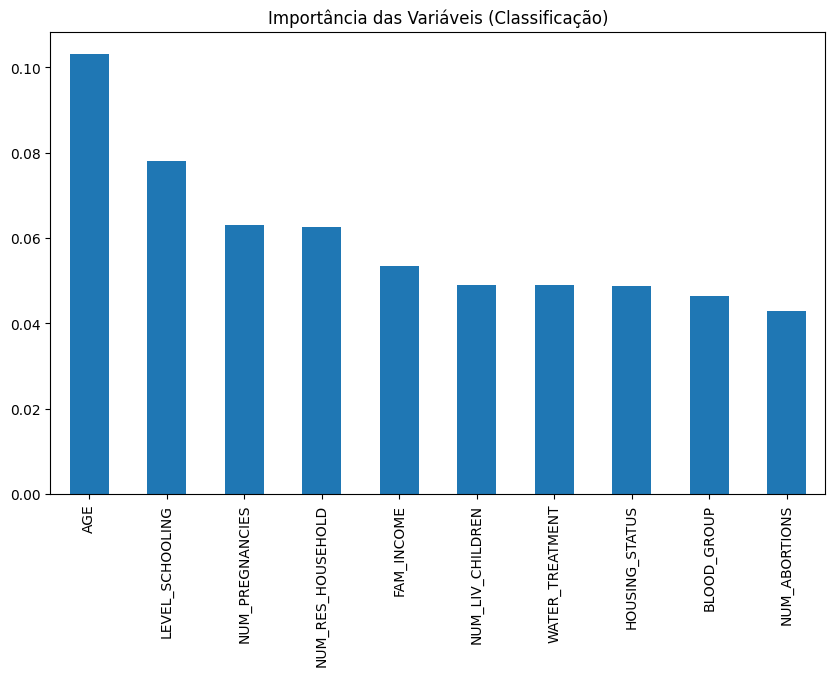

In [ ]:
# Importância das variáveis para classificação
feature_importance_class = pd.Series(
    rf_classifier.feature_importances_, index=X_classification.columns).sort_values(ascending=False)

print("Top 10 Variáveis mais importantes (Classificação):")
print(feature_importance_class.head(10))

# Visualizar
feature_importance_class.head(10).plot(kind='bar', figsize=(10, 6), title='Importância das Variáveis (Classificação)')
plt.show()


Top 10 Variáveis mais importantes (Regressão):
LEVEL_SCHOOLING      0.088866
NUM_PREGNANCIES      0.066661
FAM_INCOME           0.057349
NUM_RES_HOUSEHOLD    0.057317
BLOOD_GROUP          0.056715
WATER_TREATMENT      0.056126
FOOD_INSECURITY      0.050304
MARITAL_STATUS       0.047315
HOUSING_STATUS       0.046881
NUM_ABORTIONS        0.044483
dtype: float64


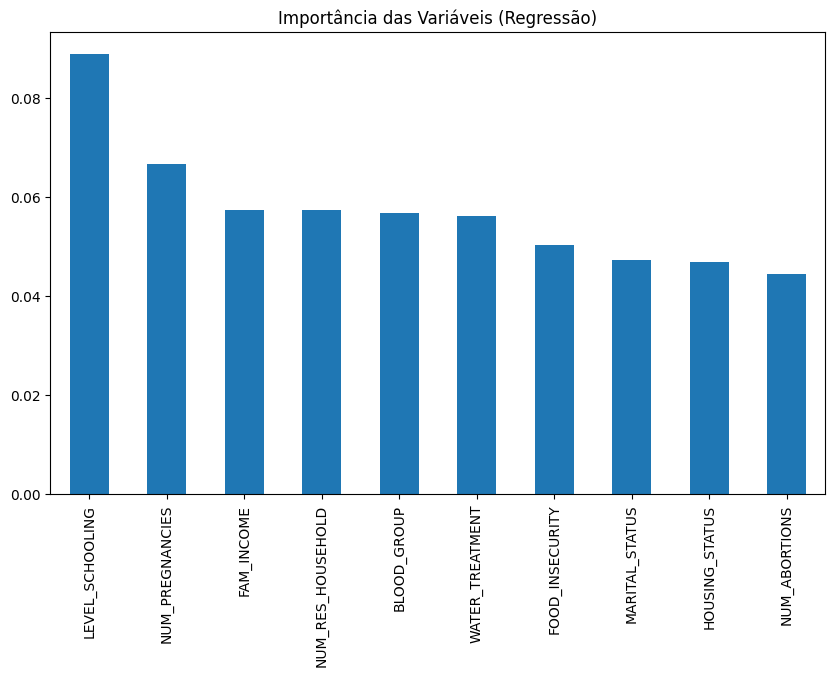

In [ ]:
# Importância das variáveis para regressão
feature_importance_reg = pd.Series(
    rf_regressor.feature_importances_, index=X_regression.columns).sort_values(ascending=False)

print("Top 10 Variáveis mais importantes (Regressão):")
print(feature_importance_reg.head(10))

# Visualizar
feature_importance_reg.head(10).plot(kind='bar', figsize=(10, 6), title='Importância das Variáveis (Regressão)')
plt.show()


In [ ]:
# Verificar importância das variáveis (Reexecutar se necessário)
feature_importance_class = pd.Series(
    rf_classifier.feature_importances_, index=X_classification.columns).sort_values(ascending=False)

feature_importance_reg = pd.Series(
    rf_regressor.feature_importances_, index=X_regression.columns).sort_values(ascending=False)

# Consolidar métricas e resultados
results = {
    "MAE (Regressão)": mae,
    "RMSE (Regressão)": rmse,
    "Top Variáveis (Classificação)": ", ".join(feature_importance_class.head(10).index.tolist()),
    "Top Variáveis (Regressão)": ", ".join(feature_importance_reg.head(10).index.tolist()),
}

# Criar DataFrame dos resultados
results_df = pd.DataFrame(list(results.items()), columns=["Métrica", "Valor"])

# Salvar o DataFrame como CSV
results_df.to_csv("final_results.csv", index=False)

# Exibir o DataFrame
print("Resultados Finais:")
print(results_df)


Resultados Finais:
                         Métrica  \
0                MAE (Regressão)   
1               RMSE (Regressão)   
2  Top Variáveis (Classificação)   
3      Top Variáveis (Regressão)   

                                               Valor  
0                                           2.880756  
1                                           4.136936  
2  AGE, LEVEL_SCHOOLING, NUM_PREGNANCIES, NUM_RES...  
3  LEVEL_SCHOOLING, NUM_PREGNANCIES, FAM_INCOME, ...  


In [ ]:
# Remover linhas com valores ausentes em y
data_final = data_final[data_final['VDRL_RESULT'].notnull()]

# Separar as variáveis independentes e dependentes novamente
X = data_final.drop('VDRL_RESULT', axis=1)
y = data_final['VDRL_RESULT']

# Verificar se ainda há valores ausentes
print("Valores ausentes em y:", y.isnull().sum())


Valores ausentes em y: 0


In [ ]:
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.model_selection import train_test_split

# Aplicar SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_balanced, y_balanced = smote_enn.fit_resample(X, y)

# Verificar a nova distribuição das classes
print("Distribuição Antes do Balanceamento:", Counter(y))
print("Distribuição Após Balanceamento:", Counter(y_balanced))

# Dividir os dados balanceados em treino e teste
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42)

print("Tamanho do conjunto de treino:", X_train_balanced.shape)
print("Tamanho do conjunto de teste:", X_test_balanced.shape)


Distribuição Antes do Balanceamento: Counter({1.0: 40935, 0.0: 826})
Distribuição Após Balanceamento: Counter({0.0: 40841, 1.0: 33335})
Tamanho do conjunto de treino: (59340, 25)
Tamanho do conjunto de teste: (14836, 25)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Treinar modelo de Random Forest
rf_classifier_balanced = RandomForestClassifier(random_state=42)
rf_classifier_balanced.fit(X_train_balanced, y_train_balanced)
y_pred_balanced = rf_classifier_balanced.predict(X_test_balanced)

# Avaliar o modelo
print("Relatório de Classificação (Dados Balanceados):")
print(classification_report(y_test_balanced, y_pred_balanced))


Relatório de Classificação (Dados Balanceados):
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      8179
         1.0       0.98      1.00      0.99      6657

    accuracy                           0.99     14836
   macro avg       0.99      0.99      0.99     14836
weighted avg       0.99      0.99      0.99     14836



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Modelo de Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

# Avaliação do modelo
classification_metrics_dt = classification_report(y_test, y_pred_dt)

print("Relatório de Classificação - Decision Tree:")
print(classification_metrics_dt)


Relatório de Classificação - Decision Tree:
              precision    recall  f1-score   support

         0.0       0.05      0.08      0.06       158
         1.0       0.98      0.97      0.97      8195

    accuracy                           0.95      8353
   macro avg       0.51      0.53      0.52      8353
weighted avg       0.96      0.95      0.96      8353



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Modelo de Regressão Linear
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_reg, y_train_reg)
y_pred_linear = linear_regressor.predict(X_test_reg)

# Avaliar o modelo Linear
mae_linear = mean_absolute_error(y_test_reg, y_pred_linear)
mse_linear = mean_squared_error(y_test_reg, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

print("Regressão Linear:")
print(f"MAE: {mae_linear:.2f}")
print(f"MSE: {mse_linear:.2f}")
print(f"RMSE: {rmse_linear:.2f}")


Regressão Linear:
MAE: 2.89
MSE: 20.09
RMSE: 4.48


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Modelo de Regressão Ridge
ridge_regressor = Ridge(alpha=1.0)  # Parâmetro alpha controla a penalização
ridge_regressor.fit(X_train_reg, y_train_reg)
y_pred_ridge = ridge_regressor.predict(X_test_reg)

# Avaliar o modelo Ridge
mae_ridge = mean_absolute_error(y_test_reg, y_pred_ridge)
mse_ridge = mean_squared_error(y_test_reg, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("\nRegressão Ridge:")
print(f"MAE: {mae_ridge:.2f}")
print(f"MSE: {mse_ridge:.2f}")
print(f"RMSE: {rmse_ridge:.2f}")


Regressão Ridge:
MAE: 2.89
MSE: 20.09
RMSE: 4.48


In [ ]:
# Top variáveis importantes do modelo Random Forest
top_variables_classification = feature_importance_class.head(10)

print("Principais variáveis relacionadas à ocorrência de sífilis congênita:")
print(top_variables_classification)


Principais variáveis relacionadas à ocorrência de sífilis congênita:
AGE                  0.103128
LEVEL_SCHOOLING      0.078015
NUM_PREGNANCIES      0.063035
NUM_RES_HOUSEHOLD    0.062541
FAM_INCOME           0.053332
NUM_LIV_CHILDREN     0.048990
WATER_TREATMENT      0.048927
HOUSING_STATUS       0.048816
BLOOD_GROUP          0.046331
NUM_ABORTIONS        0.042953
dtype: float64
